<a href="https://colab.research.google.com/github/peter-pc731/OS-X-Clover-Laptop-Config/blob/master/1005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
print('xtrain.shape={}'.format(xtrain.shape))
print('ytrain.shape={}'.format(ytrain.shape))
print('xtest.shape={}'.format(xtest.shape))
print('ytest.shape={}'.format(ytest.shape))
'''
xtrain.shape=(60000, 28, 28)
ytrain.shape=(60000,)
xtest.shape=(10000, 28, 28)
ytest.shape=(10000,)
'''

xtrain.shape=(60000, 784)
ytrain.shape=(60000,)
xtest.shape=(10000, 784)
ytest.shape=(10000,)


'\nxtrain.shape=(60000, 28, 28)\nytrain.shape=(60000,)\nxtest.shape=(10000, 28, 28)\nytest.shape=(10000,)\n'

In [4]:
def plot_img(ndarr):
    img = ndarr.copy()
    img.shape = (28,28)
    plt.imshow(img, cmap='gray')
    plt.show()

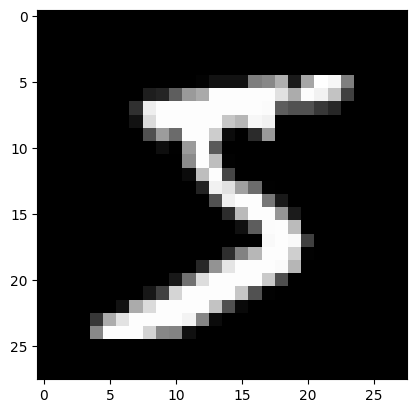

In [5]:
plot_img(xtrain[0,:])

In [6]:
print('label of img 5= {}'.format(ytrain[0]))
# label of img 5= 2

label of img 5= 5


In [7]:
xtrain = xtrain.reshape(xtrain.shape[0], -1)
xtest = xtest.reshape(xtest.shape[0], -1)
print('xtrain.shape={}'.format(xtrain.shape))
print('xtest.shape={}'.format(xtest.shape))
'''
xtrain.shape=(60000, 784)
xtest.shape=(10000, 784)
'''

xtrain.shape=(60000, 784)
xtest.shape=(10000, 784)


'\nxtrain.shape=(60000, 784)\nxtest.shape=(10000, 784)\n'

In [8]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain /= 255 # normalize
xtest /= 255  # normalize

In [9]:
# ytrain = np.eye(10)[ytrain] # one hot encoding for 10 classes
# ytest = np.eye(10)[ytest]   # one hot encoding for 10 classes

In [10]:
# def next_batch(batch_size, data, labels):
#     idx = np.arange(0 , len(data))
#     np.random.shuffle(idx)
#     idx = idx[:batch_size]
#     data_shuffle = [data[i] for i in idx]
#     labels_shuffle = [labels[i] for i in idx]
#     return np.asarray(data_shuffle), np.asarray(labels_shuffle)
# # xbatch, ybatch = next_batch(128, xtrain, ytrain) # batch size=128

In [11]:
# xbatch, ybatch = next_batch(128, xtrain, ytrain) # batch size=128

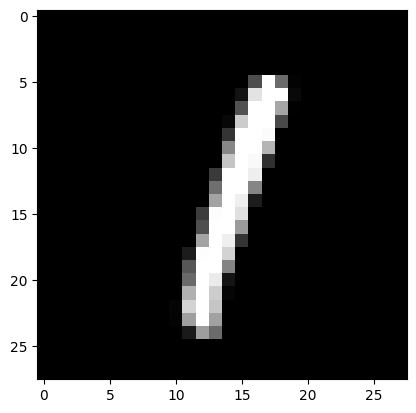

In [12]:
plot_img(xtest[5,:])

In [13]:
print('label of img 5= {}'.format(ytest[3]))

label of img 5= 0


In [14]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# network.compile(optimizer='rmsprop',
#                 loss='categorical_crossentropy',
#                 metrics=['accuracy'])

network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# from keras.optimizers import Adam
# network.compile(optimizer=Adam(learning_rate=0.0005),
#                 loss='categorical_crossentropy',
#                 metrics=['accuracy'])

In [16]:
fix_train_images = xtrain.reshape((60000, 28 * 28)).astype('float32') / 255
fix_test_images = xtest.reshape((10000, 28 * 28)).astype('float32') / 255

In [17]:
from keras.utils import to_categorical

fix_train_labels = to_categorical(ytrain)
fix_test_labels = to_categorical(ytest)

In [18]:
result = network.fit(
    fix_train_images,
    fix_train_labels,
    validation_split=0.4,
    epochs=20,
    batch_size=128,
    validation_data=(fix_test_images, fix_test_labels))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5429 - loss: 1.8550 - val_accuracy: 0.8411 - val_loss: 0.6945
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8486 - loss: 0.6108 - val_accuracy: 0.8899 - val_loss: 0.4325
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8880 - loss: 0.4230 - val_accuracy: 0.9020 - val_loss: 0.3571
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9013 - loss: 0.3574 - val_accuracy: 0.9102 - val_loss: 0.3213
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9094 - loss: 0.3198 - val_accuracy: 0.9140 - val_loss: 0.3001
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9142 - loss: 0.3045 - val_accuracy: 0.9148 - val_loss: 0.2881
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9158 - loss: 0.2886 - val_accuracy: 0.9201 - val_loss: 0.2746
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9200 - loss: 0.2778 - val_accuracy: 0.

In [19]:
fix_train_labels.shape

(60000, 10)

In [20]:
fix_train_images.shape

(60000, 784)

In [21]:
test_loss, test_acc = network.evaluate(fix_test_images, fix_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9405 - loss: 0.1996
test_loss: 0.17335480451583862
test_acc: 0.9491999745368958


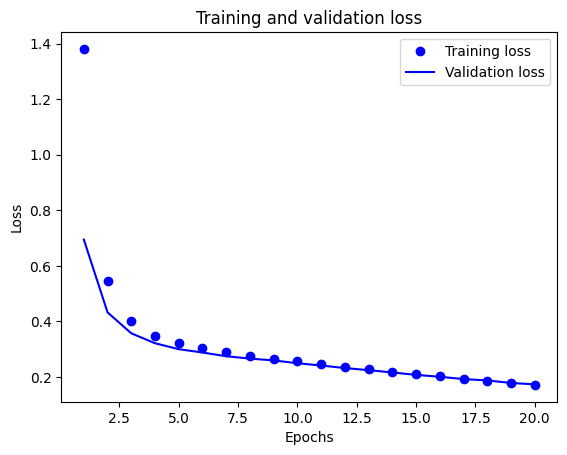

In [22]:
history_dict = result.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

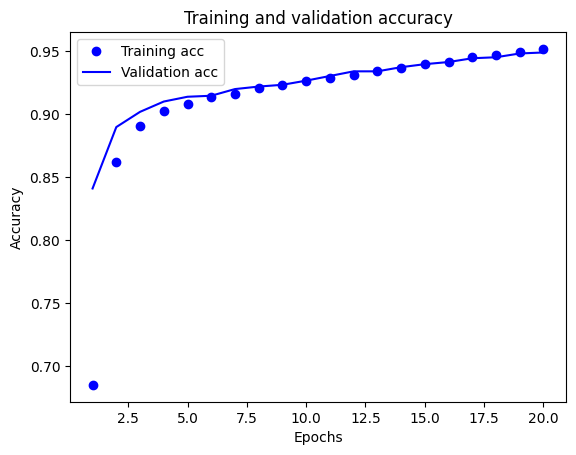

In [23]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()